In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [1]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [2]:
gensim.__version__

'4.3.2'

In [3]:
np.random.seed(42)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Use Pretrained Word Vectors

In [6]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [7]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [8]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [9]:
# wv = api.load('word2vec-google-news-300')
wv.save('vectors.kv')

In [10]:
wv['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [11]:
len(wv['apple'])

300

In [4]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('vectors.kv')

In [5]:
wv.similarity("apple", "mango")

0.57518554

In [6]:
wv.similarity("apple", "car")

0.12830707

In [7]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [8]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [9]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


#### Semantic regularities captured in word embeddings

In [10]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [11]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('man', 0.6628609299659729),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074066162109)]

In [12]:
words = ["ball",'bat','football','basketball','table']

In [27]:
# https://deepai.org/dataset/text8

In [13]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 1.0603584 , -1.1092708 ],
       [ 1.9596825 , -0.6188101 ],
       [-1.5409298 , -0.31563047],
       [-1.8562099 , -0.5068036 ],
       [ 0.37709868,  2.550516  ]], dtype=float32)

### Visualizing these word vectors

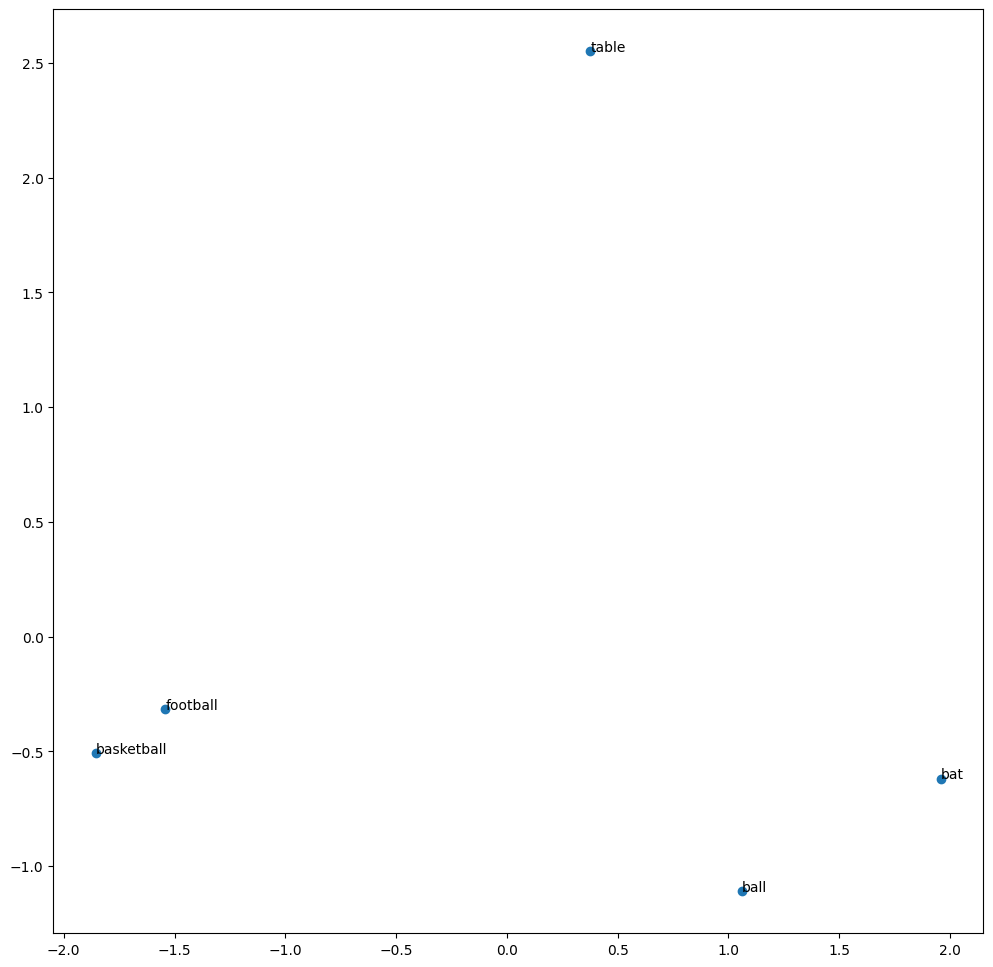

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [15]:
data = pd.read_csv("FullDataset/final_dataset.csv")
data.head()

,id,content,label
0,1,Electromagnetic fields (EMFs) are invisible li...,1
1,2,Cryptosporidium infection in acquired immunode...,0
2,3,"In today's world, it is not uncommon to see p...",1
3,4,Tension pneumopericardium as a complication of...,0
4,5,Urgent care center pediatric telephone advice....,0


In [16]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [17]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [18]:
sent_vec("I am happy")

array([-0.08447266,  0.10973685, -0.00453404,  0.18362863, -0.05944824,
       -0.04013497, -0.10041155,  0.03710938, -0.02503313,  0.04729353,
       -0.07543836, -0.16434152, -0.1116333 ,  0.02915737, -0.12290737,
        0.10421317, -0.00425502,  0.27535575, -0.01681083, -0.08075387,
       -0.26747349, -0.07281712,  0.08138602, -0.02498954, -0.05358887,
       -0.07969884, -0.30385045,  0.10531616, -0.03756278, -0.04029192,
        0.06455776, -0.02200753, -0.11361694, -0.12702288, -0.19824219,
        0.06921387, -0.14557757,  0.18457031, -0.05542864,  0.10093471,
        0.10728237, -0.07920619, -0.01236398,  0.11485073,  0.09437779,
        0.02020509, -0.08954729, -0.12911551, -0.0363072 ,  0.05212402,
       -0.12200056,  0.23856027, -0.04056222,  0.12512207,  0.05569894,
        0.1237793 , -0.08370536, -0.05489676, -0.0291748 , -0.18401228,
       -0.14592634, -0.04910714, -0.15844727, -0.03636387,  0.00628662,
       -0.30032785, -0.11404855,  0.08530971,  0.01077706,  0.05

In [36]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/12.8 MB 1.8 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/12.8 MB 4.8 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 6.8 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 8.2 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 9.6 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 9.6 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 9.6 MB/s eta 0:00:01
     ------------ --------------------------- 4.2/12.8 MB 7.8 MB/s

In [19]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'many', 'beyond', 'does', 'already', 'she', 'by', 'others', 'back', 'i', 'eleven', 'thru', 'side', 'n‘t', 'again', 'being', 'less', 'twelve', 'us', 'between', 'herein', 'anything', 'been', 'do', 'sometime', 'yourselves', 'whither', 'above', 'for', 'have', 'elsewhere', 'something', 'on', 'meanwhile', 'otherwise', '‘d', 'empty', 'three', 'some', 'across', 'together', '‘re', 'none', 'of', 'thus', 'much', 'although', 'myself', 'nor', 'has', 'around', 'though', 'say', 'someone', 'alone', 'name', 'should', 'into', 'herself', 'not', 'can', 'hereupon', 'whole', 'than', 'any', 'first', 'would', 'done', 'under', 'below', 'due', 'serious', 'hers', 'next', 'they', 'same', 'anywhere', 'these', 'least', 'thence', 'namely', 'becoming', 'whereupon', 'now', 'give', 'show', 'whence', '‘ll', '‘s', 'his', 'more', 'ca', 'n’t', 'along', 'my', 'who', 'wherein', 'former', "'s", 'enough', "'d", 'anyone', 'last', 'this', 'move', 'made', 'various', 'beforehand', 'then', 'therefore', 'whoever', 'from', 'whereaft

In [20]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
data['tokens'] = data['content'].apply(spacy_tokenizer)

In [22]:
data.head()

,id,content,label,tokens
0,1,Electromagnetic fields (EMFs) are invisible li...,1,"[electromagnetic, field, emfs, invisible, line..."
1,2,Cryptosporidium infection in acquired immunode...,0,"[cryptosporidium, infection, acquire, immunode..."
2,3,"In today's world, it is not uncommon to see p...",1,"[today, world, uncommon, people, plan, future,..."
3,4,Tension pneumopericardium as a complication of...,0,"[tension, pneumopericardium, complication, sin..."
4,5,Urgent care center pediatric telephone advice....,0,"[urgent, care, center, pediatric, telephone, a..."


In [23]:
data['vec'] = data['tokens'].apply(sent_vec)

In [24]:
data.head()

,id,content,label,tokens,vec
0,1,Electromagnetic fields (EMFs) are invisible li...,1,"[electromagnetic, field, emfs, invisible, line...","[-0.04612275283702098, 0.009728257673500228, -..."
1,2,Cryptosporidium infection in acquired immunode...,0,"[cryptosporidium, infection, acquire, immunode...","[-0.057352014490076014, 0.13239886309649493, 0..."
2,3,"In today's world, it is not uncommon to see p...",1,"[today, world, uncommon, people, plan, future,...","[-0.004573328354779411, 0.07043986600988052, 0..."
3,4,Tension pneumopericardium as a complication of...,0,"[tension, pneumopericardium, complication, sin...","[0.005199291087962963, 0.15038610387731483, -0..."
4,5,Urgent care center pediatric telephone advice....,0,"[urgent, care, center, pediatric, telephone, a...","[-0.09102916717529297, 0.052025794982910156, 0..."


In [25]:
X = data['vec'].to_list()
y = data['label'].to_list()

In [26]:
len(X)

23047

In [27]:
X[0]

array([-0.04612275,  0.00972826, -0.01876096,  0.03108026, -0.09336374,
        0.05910976,  0.08411669, -0.07103779,  0.13135189,  0.06840565,
       -0.05161611, -0.1419651 , -0.01805638,  0.01139275, -0.10507003,
        0.08225367, -0.01931852,  0.10755041,  0.03694071, -0.09589202,
        0.04206347, -0.04098046, -0.11345144,  0.04956773, -0.03642025,
       -0.01036467, -0.0558724 ,  0.02303016, -0.02879634, -0.02706433,
       -0.0125063 , -0.07058822, -0.04357289, -0.07436147, -0.02952119,
       -0.07337183,  0.01593441,  0.02892251,  0.04183247,  0.03606944,
       -0.02253734,  0.01311866,  0.02338084,  0.00743592, -0.09241495,
       -0.14969808, -0.0227821 ,  0.03200782, -0.06645748,  0.01617699,
       -0.01118581, -0.00843956, -0.06515475, -0.05628243,  0.0316376 ,
       -0.0265433 , -0.02422695, -0.09868447,  0.00436685, -0.03222227,
       -0.06467321,  0.00408685, -0.04464858,  0.04794144, -0.01509061,
        0.0051352 , -0.09036389,  0.16974456, -0.05454669,  0.02

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9783080260303688

In [32]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2310
           1       0.99      0.97      0.98      2300

    accuracy                           0.98      4610
   macro avg       0.98      0.98      0.98      4610
weighted avg       0.98      0.98      0.98      4610



In [33]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
 
print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Precision = 0.9889
Recall = 0.9674
F1 Score = 0.978


In [34]:
confusion_matrix(y_test,y_pred)

array([[2285,   25],
       [  75, 2225]], dtype=int64)

In [48]:
health_content = "Preventive health comes down to the innumerable micro-decisions each of us make every day. Bacon at breakfast may be another inconsequential food in your week, while a lifetime of eating processed meats can tip the scales between colon cancer and health."
# Preprocess the input sentence
preprocessed_sentence = spacy_tokenizer(health_content)

# Convert the preprocessed sentence into a numerical feature vector
input_vector = sent_vec(preprocessed_sentence)
input_vector = input_vector.reshape(1, -1)  # Reshape the vector to match the model input shape

# Use the trained RF model to predict the label for the input feature vector
predicted_label = rf.predict(input_vector)

# Print the predicted label
print("Predicted Label:", predicted_label)


Predicted Label: [1]
